⚙️ Semana 1 — Miércoles: Visualización y Análisis Exploratorio
- Autor: Raúl Silva Orellana  
- Objetivo: Graficar relaciones clave y detectar patrones en Titanic.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Configuración estética
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

print("✅ Librerías cargadas")

✅ Librerías cargadas


In [3]:
# Carga el dataset
df = pd.read_csv("../data/raw/titanic.csv")

print(f"✅ Datos: {df.shape[0]} filas, {df.shape[1]} columnas")

✅ Datos: 891 filas, 12 columnas


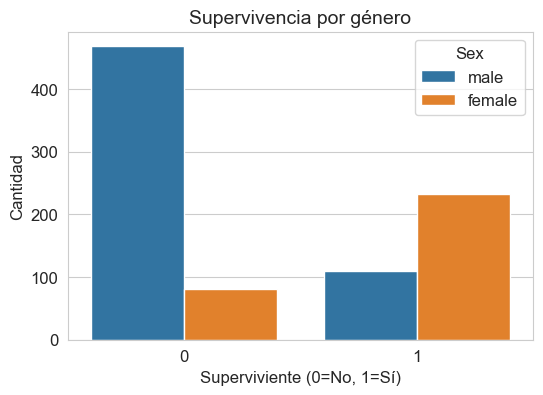

In [4]:
# 1. Distribución de supervivencia (countplot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Survived", hue="Sex")
plt.title("Supervivencia por género", fontsize=14)
plt.xlabel("Superviviente (0=No, 1=Sí)")
plt.ylabel("Cantidad")
plt.show()

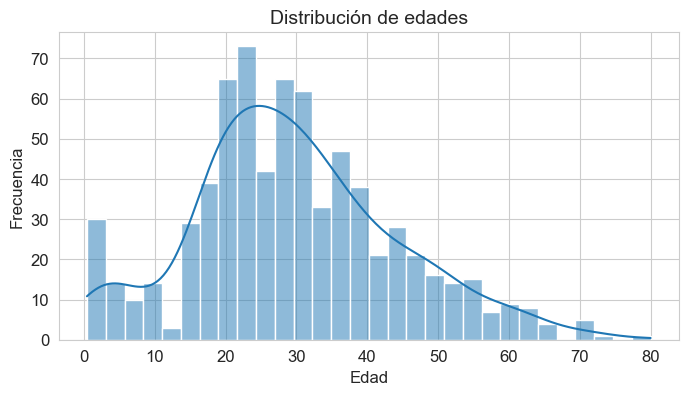

In [5]:
# 2. Distribución de edad (histplot + kde)
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="Age", kde=True, bins=30)
plt.title("Distribución de edades", fontsize=14)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

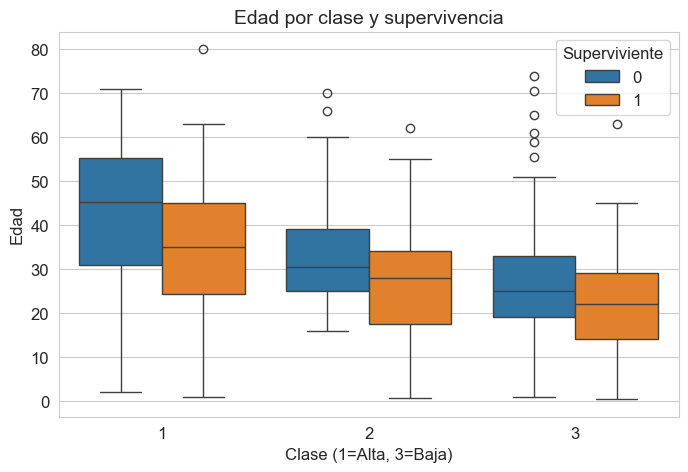

In [6]:
# 3. Boxplot: Edad por clase y supervivencia
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Pclass", y="Age", hue="Survived")
plt.title("Edad por clase y supervivencia", fontsize=14)
plt.xlabel("Clase (1=Alta, 3=Baja)")
plt.ylabel("Edad")
plt.legend(title="Superviviente")
plt.show()

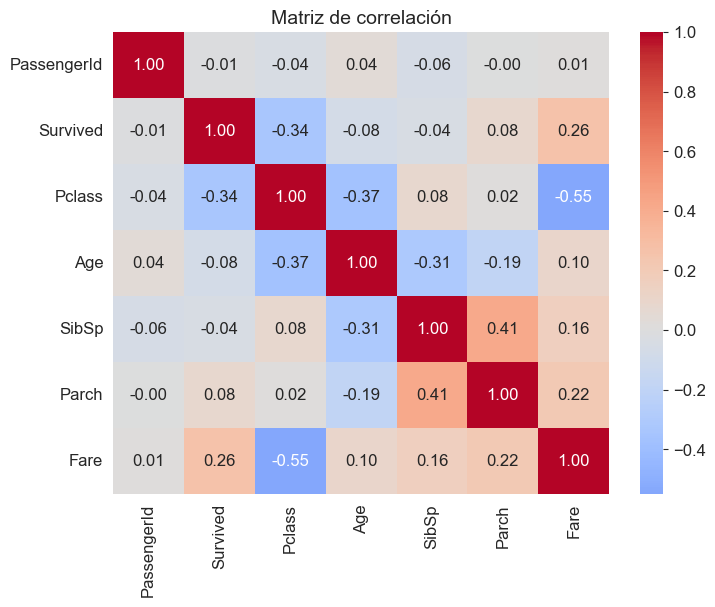

In [7]:
# 4. Mapa de calor de correlación (solo numéricas)
numeric_cols = df.select_dtypes(include=["number"]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación", fontsize=14)
plt.show()

### 2. Manejo de nulos y outliers

In [8]:
# Porcentaje de nulos
null_pct = (df.isnull().sum() / len(df)) * 100
null_pct = null_pct[null_pct > 0].sort_values(ascending=False)

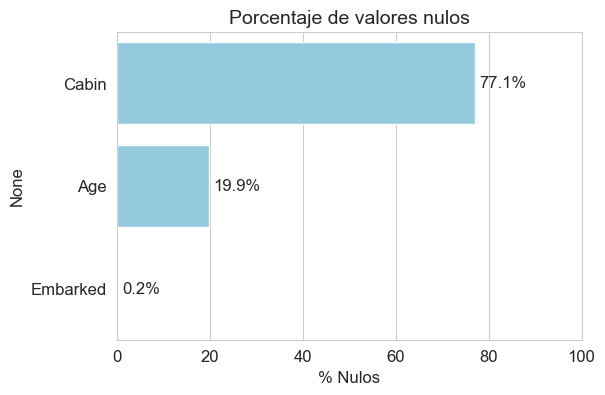

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x=null_pct.values, y=null_pct.index, color="skyblue")
plt.title("Porcentaje de valores nulos", fontsize=14)
plt.xlabel("% Nulos")
plt.xlim(0, 100)
for i, v in enumerate(null_pct.values):
    plt.text(v + 1, i, f"{v:.1f}%", va="center")
plt.show()

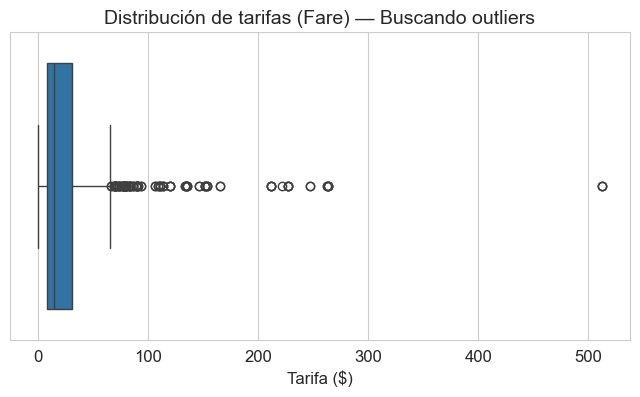

In [10]:
# Boxplot interactivo para detectar outliers en 'Fare'
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Fare")
plt.title("Distribución de tarifas (Fare) — Buscando outliers", fontsize=14)
plt.xlabel("Tarifa ($)")
plt.show()

In [11]:
# Mostrar top 5 tarifas más altas
print("Top 5 tarifas más altas:")
df[["Name", "Pclass", "Fare"]].sort_values("Fare", ascending=False).head()

Top 5 tarifas más altas:


,Name,Pclass,Fare
258,"Ward, Miss. Anna",1,512.3292
737,"Lesurer, Mr. Gustave J",1,512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",1,512.3292
88,"Fortune, Miss. Mabel Helen",1,263.0000
27,"Fortune, Mr. Charles Alexander",1,263.0000


In [12]:
# Imputación simple: rellenar 'Age' con mediana
df_clean = df.copy()
median_age = df_clean["Age"].median()
df_clean["Age"] = df_clean["Age"].fillna(median_age)

In [13]:
print(f"✅ Imputado 'Age' con mediana: {median_age:.1f} años")
print(f"Nulos en 'Age' ahora: {df_clean['Age'].isnull().sum()}")

✅ Imputado 'Age' con mediana: 28.0 años
Nulos en 'Age' ahora: 0


In [14]:
# Guardar dataset limpio (para usar el sábado)
df_clean.to_csv("../data/processed/titanic_clean.csv", index=False)
print("✅ Dataset limpio guardado en data/processed/titanic_clean.csv")

✅ Dataset limpio guardado en data/processed/titanic_clean.csv
